# Car Damage Detection system (AutoEyes)

# Team members :
- Hanadi Almoutairy
- Sheikha Alobodi  
- Faris Alotibi 
- Abdulmalik Alsharekh

# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.image import convert_image_dtype
import os
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# EDA

In [1]:
import os
import time
import cv2
import glob
import matplotlib.pyplot as plt


print(os.listdir(r'C:\Users\Sheikha\Downloads\data1a\data1a\validation'))

['00-damage', '01-whole']


In [2]:
data_dir = r'C:\Users\Sheikha\Downloads\data1a\data1a\training'
labels = ['00-damage', '01-whole']

for label in labels:
    path = os.path.join(data_dir, label)
    num_images = len(os.listdir(path))
    print("Number of images in", label, "class:", num_images)

Number of images in 00-damage class: 920
Number of images in 01-whole class: 920


In [4]:
data_dir = r'C:\Users\Sheikha\Downloads\data1a\data1a\validation'
labels = ['00-damage', '01-whole']

for label in labels:
    path = os.path.join(data_dir, label)
    num_images = len(os.listdir(path))
    print("Number of images in", label, "class:", num_images)

Number of images in 00-damage class: 230
Number of images in 01-whole class: 230


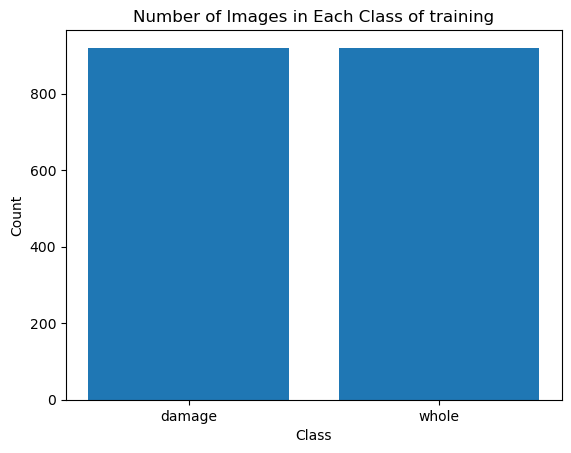

In [6]:
labels = ['damage', 'whole']
counts = [920, 920]


plt.bar(labels, counts)
plt.title("Number of Images in Each Class of training")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

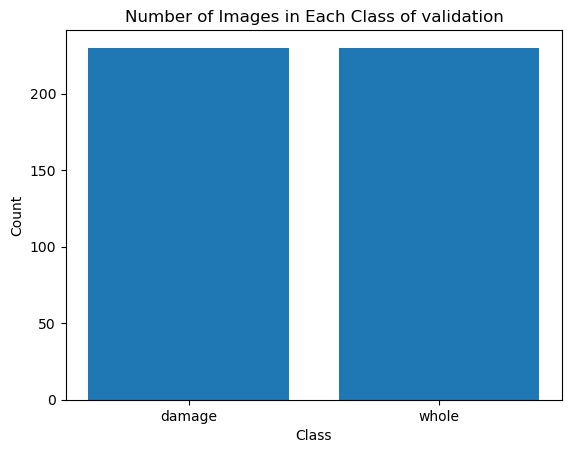

In [7]:
labels = ['damage', 'whole']
counts = [230, 230]


plt.bar(labels, counts)
plt.title("Number of Images in Each Class of validation")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

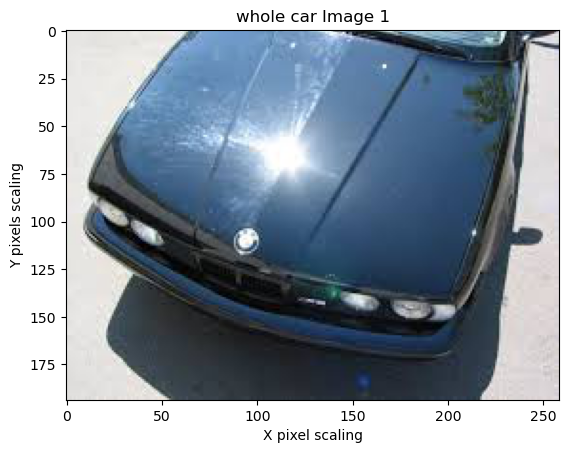

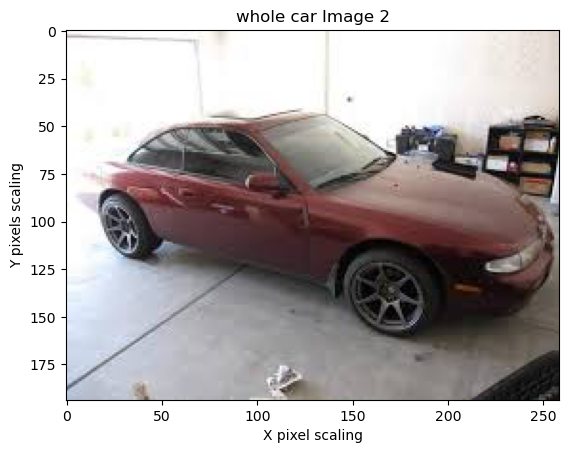

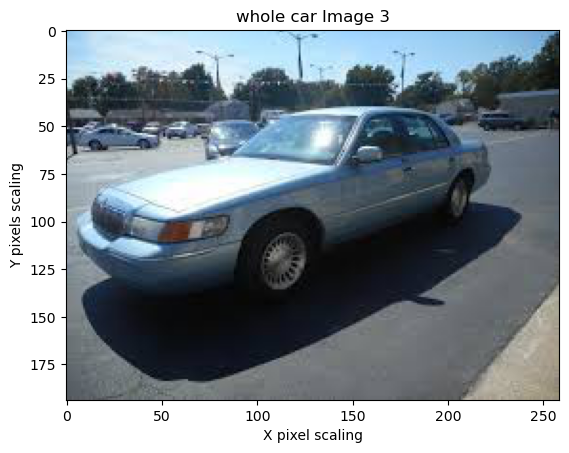

In [10]:
# Visualaision image 1 
plt.title("whole car Image 1")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
image1 = mpimg.imread(r"C:\Users\Sheikha\Downloads\data1a\data1a\training\01-whole\0911.JPEG")
plt.imshow(image1)
plt.show()

# Visualaision image 2
plt.title("whole car Image 2")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
image2 = mpimg.imread(r"C:\Users\Sheikha\Downloads\data1a\data1a\training\01-whole\0912.JPEG")
plt.imshow(image2)
plt.show()

# Visualaision image 3
plt.title("whole car Image 3")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
image3 = mpimg.imread(r"C:\Users\Sheikha\Downloads\data1a\data1a\training\01-whole\0913.JPEG")
plt.imshow(image3)
plt.show()

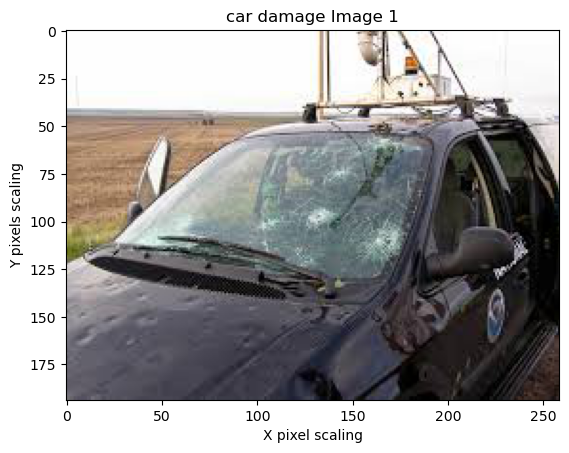

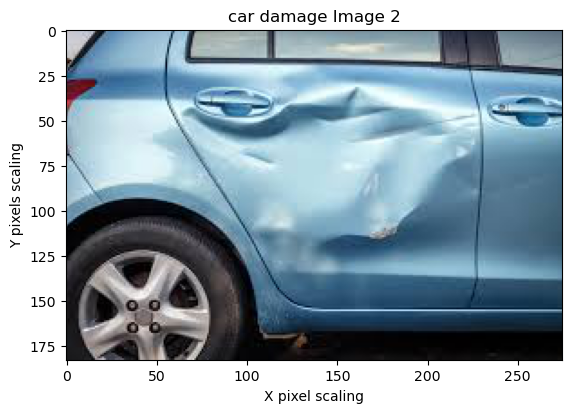

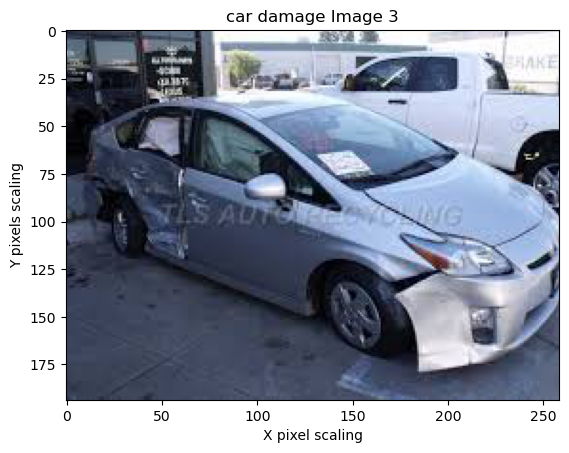

In [9]:
# Visualaision image 1
plt.title("car damage Image 1")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
image1 = mpimg.imread(r"C:\Users\Sheikha\Downloads\data1a\data1a\training\00-damage\0901.JPEG")
plt.imshow(image1)
plt.show()

# Visualaision image 2
plt.title("car damage Image 2")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
image2 = mpimg.imread(r"C:\Users\Sheikha\Downloads\data1a\data1a\training\00-damage\0902.JPEG")
plt.imshow(image2)
plt.show()

# Visualaision image 3
plt.title("car damage Image 3")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
image3 = mpimg.imread(r"C:\Users\Sheikha\Downloads\data1a\data1a\training\00-damage\0903.JPEG")
plt.imshow(image3)
plt.show()

# Deep learning Algorithm (MobileNetV2)

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-5
EPOCHS = 35
BS = 64

DIRECTORY = "/content/drive/MyDrive/data1a/training"
DIRECTORY2= "/content/drive/MyDrive/data1a/validation"
CATEGORIES = ["00-damage", "01-whole"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class labels
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224), color_mode="rgb")  # Changed color_mode to "rgb"
        image = img_to_array(image)
        image = convert_image_dtype(image, dtype=np.float32)
        data.append(image)
        labels.append(category)

for category in CATEGORIES:
    path = os.path.join(DIRECTORY2, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224), color_mode="rgb")  # Changed color_mode to "rgb"
        image = img_to_array(image)
        image = convert_image_dtype(image, dtype=np.float32)
        data.append(image)
        labels.append(category)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))  # Changed input shape

# construct the head of the model that will be placed on top of the
# base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(2, 2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

# compile the model
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS
)

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set, find the index of the
# label with the corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving car detection model...")
model.save("MobileNet_Car_detection_vFaris.model", save_format="h5")



[INFO] loading images...
[INFO] compiling model...
[INFO] training head...
Epoch 1/35
28/28 [==============================] - 148s 5s/step - loss: 1.3715 - accuracy: 0.5365 - val_loss: 0.8470 - val_accuracy: 0.5705
Epoch 2/35
28/28 [==============================] - 124s 4s/step - loss: 1.0464 - accuracy: 0.5708 - val_loss: 0.7457 - val_accuracy: 0.6182
Epoch 3/35
28/28 [==============================] - 145s 5s/step - loss: 0.8849 - accuracy: 0.5876 - val_loss: 0.6860 - val_accuracy: 0.6377
Epoch 4/35
28/28 [==============================] - 126s 4s/step - loss: 0.7803 - accuracy: 0.6118 - val_loss: 0.6497 - val_accuracy: 0.6703
Epoch 5/35
28/28 [==============================] - 125s 4s/step - loss: 0.7209 - accuracy: 0.6242 - val_loss: 0.6169 - val_accuracy: 0.6855
Epoch 6/35
28/28 [==============================] - 146s 5s/step - loss: 0.6881 - accuracy: 0.6472 - val_loss: 0.6018 - val_accuracy: 0.6768
Epoch 7/35
28/28 [==============================] - 146s 5s/step - loss: 0.6653

# After optimization

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-5
EPOCHS = 50
BS = 64

DIRECTORY = "/content/drive/MyDrive/data1a/training"
DIRECTORY2= "/content/drive/MyDrive/data1a/validation"
CATEGORIES = ["00-damage", "01-whole"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class labels
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224), color_mode="rgb")  # Changed color_mode to "rgb"
        image = img_to_array(image)
        image = convert_image_dtype(image, dtype=np.float32)
        data.append(image)
        labels.append(category)

for category in CATEGORIES:
    path = os.path.join(DIRECTORY2, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224), color_mode="rgb")  # Changed color_mode to "rgb"
        image = img_to_array(image)
        image = convert_image_dtype(image, dtype=np.float32)
        data.append(image)
        labels.append(category)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))  # Changed input shape

# construct the head of the model that will be placed on top of the
# base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(2, 2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

# compile the model
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS
)

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set, find the index of the
# label with the corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving car detection model...")
model.save("MobileNet_Car_detection_v2Faris.model", save_format="h5")



[INFO] loading images...
[INFO] compiling model...
[INFO] training head...
Epoch 1/50
28/28 [==============================] - 160s 6s/step - loss: 1.4301 - accuracy: 0.5275 - val_loss: 0.8465 - val_accuracy: 0.5835
Epoch 2/50
28/28 [==============================] - 148s 5s/step - loss: 1.0561 - accuracy: 0.5653 - val_loss: 0.7209 - val_accuracy: 0.6291
Epoch 3/50
28/28 [==============================] - 148s 5s/step - loss: 0.9173 - accuracy: 0.5826 - val_loss: 0.6692 - val_accuracy: 0.6790
Epoch 4/50
28/28 [==============================] - 129s 5s/step - loss: 0.8255 - accuracy: 0.6157 - val_loss: 0.6252 - val_accuracy: 0.6985
Epoch 5/50
28/28 [==============================] - 129s 5s/step - loss: 0.7067 - accuracy: 0.6445 - val_loss: 0.5883 - val_accuracy: 0.7180
Epoch 6/50
28/28 [==============================] - 147s 5s/step - loss: 0.6805 - accuracy: 0.6551 - val_loss: 0.5670 - val_accuracy: 0.7223
Epoch 7/50
28/28 [==============================] - 128s 5s/step - loss: 0.6470